In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin

from scipy.io import loadmat #To Read .mat files
import matplotlib.image as mpimg # 

from sklearn import svm
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from collections import Counter


%config InlineBackend.figure_format = 'retina'
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
print("Setup Complete")

Setup Complete


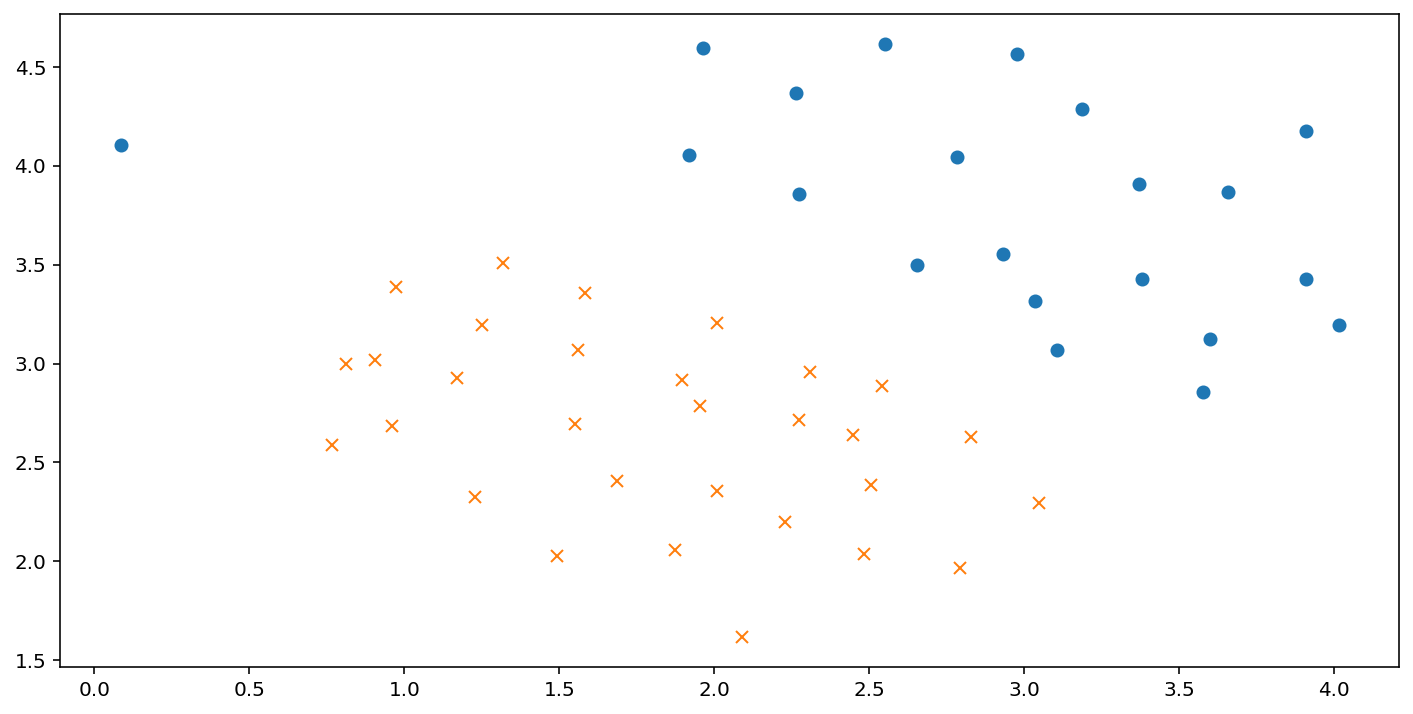

In [136]:
X = loadmat('data/ex6data1.mat')['X']
y = loadmat('data/ex6data1.mat')['y']
X_pos = X[np.nonzero(y==1)[0]]
X_neg = X[np.nonzero(y==0)[0]]
fig,ax = plt.subplots()
ax.plot(X_pos[:,0],X_pos[:,1],'o',X_neg[:,0],X_neg[:,1],'x')

# Linear Kernel

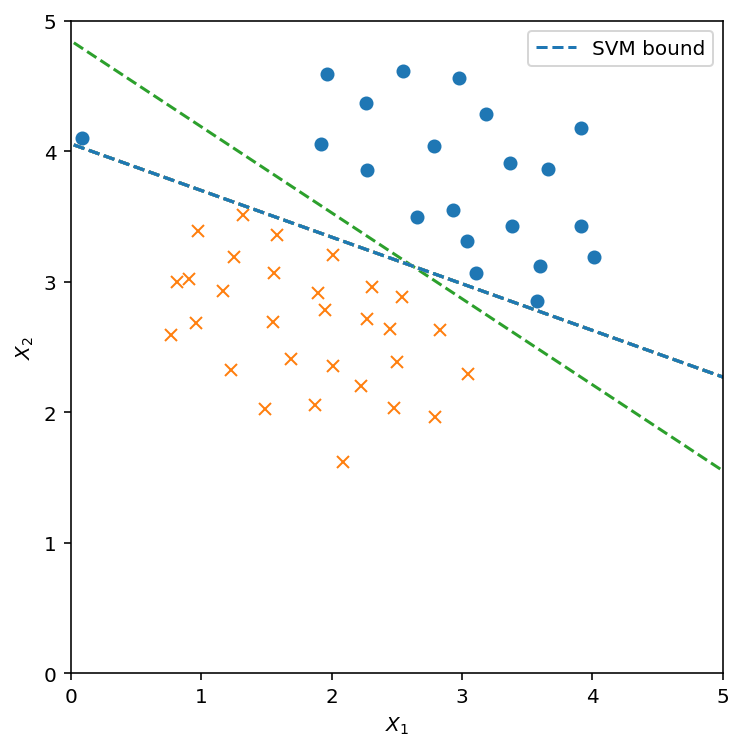

In [148]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X,np.squeeze(y))
clf.coef_,clf.intercept_
min_X = np.min(X)
max_X = np.max(X)
xx = np.linspace(min_X-2,max_X+2)
w = clf.coef_[0]#->coef_ gives a weight for each feature. 
yy = -(xx*w[0] + clf.intercept_[0])/w[1] #-> to plot parametric plot, need to divide by one of the two weights. Negative sign!
ax.plot(xx,yy,'--',label='SVM bound')
ax.set(aspect="equal",
       xlim=(0, 5), ylim=(0, 5),
       xlabel="$X_1$", ylabel="$X_2$")
ax.legend()
fig

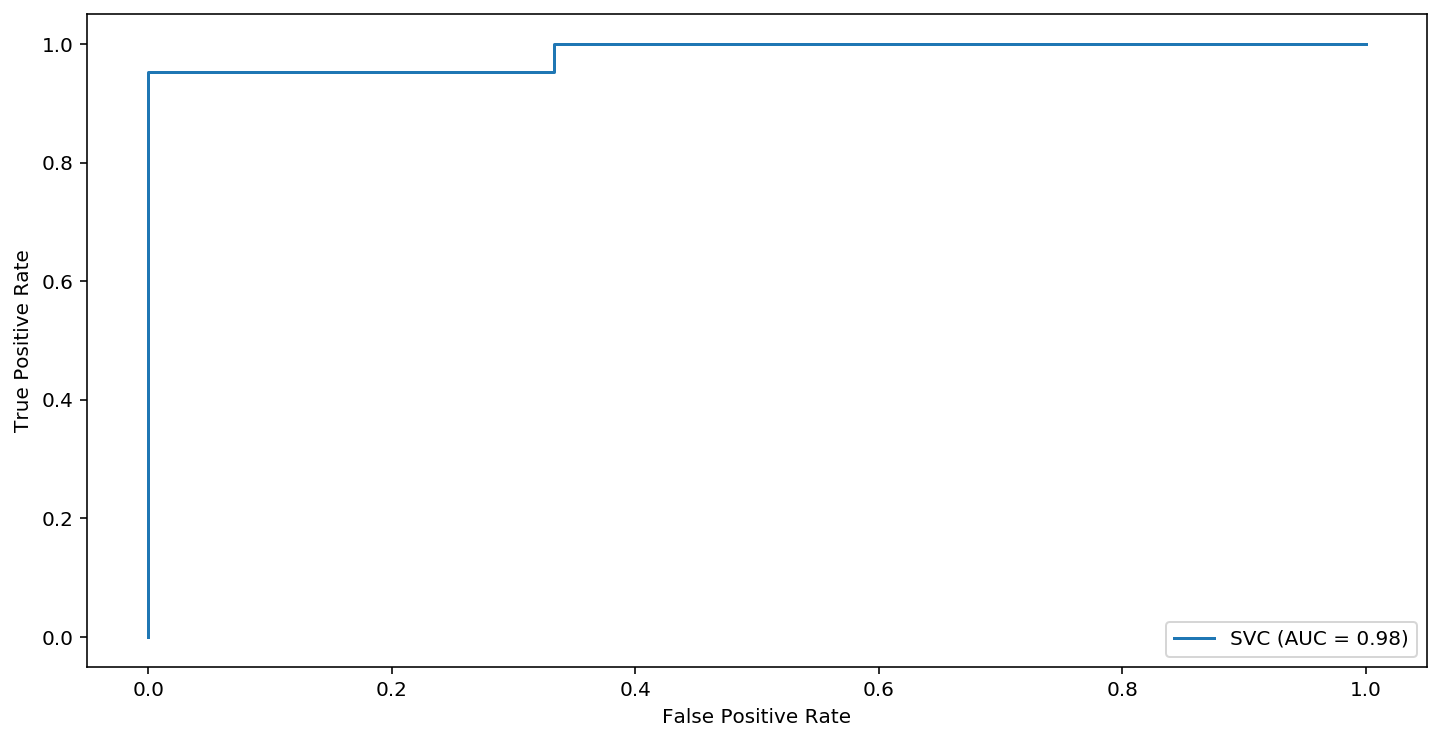

In [97]:
plot_roc_curve(clf, X,np.squeeze(y))

# Gaussian Kernel

In [216]:
X2 = loadmat("data/ex6data2.mat")['X']
y2 = loadmat("data/ex6data2.mat")['y']
X2_pos = X2[np.nonzero(y2)[0]]
X2_neg = X2[np.nonzero(y2==0)[0]]

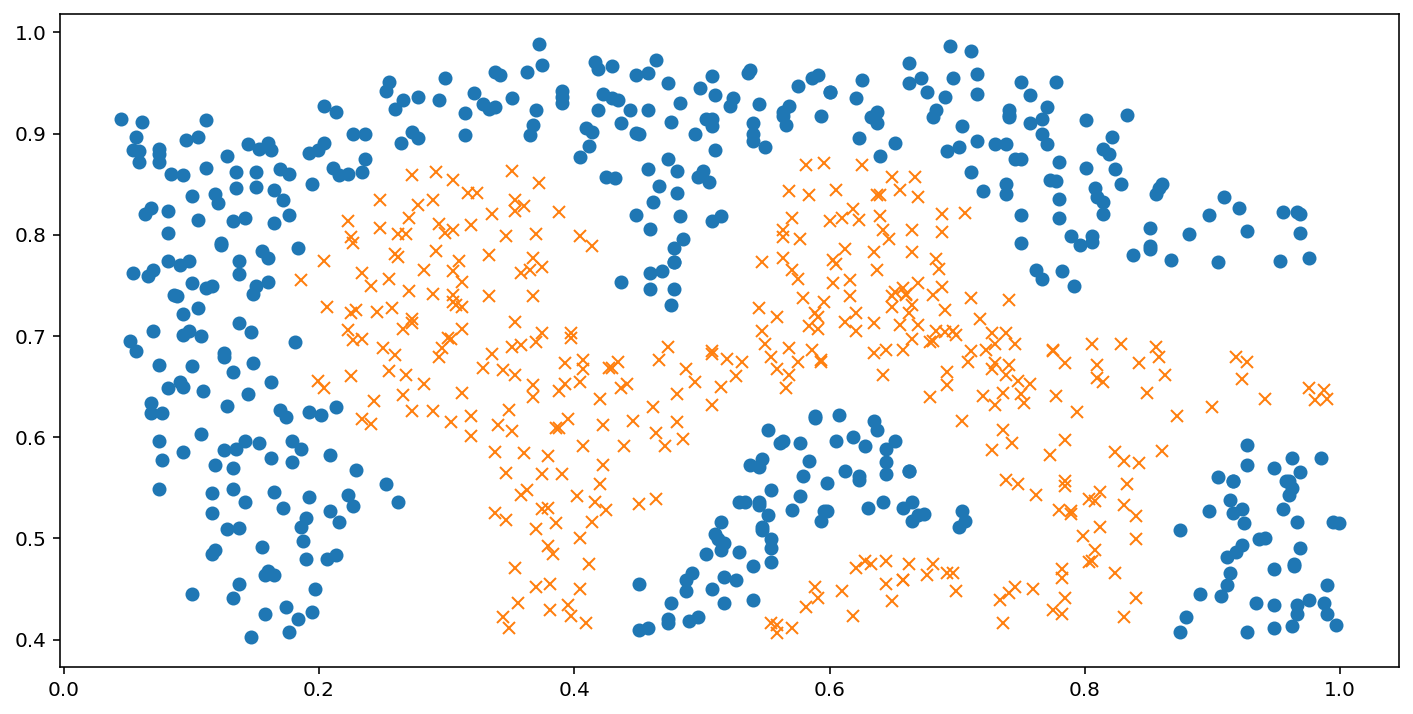

In [413]:
fig2,ax2 = plt.subplots()
ax2.plot(X2_pos[:,0],X2_pos[:,1],'o',X2_neg[:,0],X2_neg[:,1],'x')

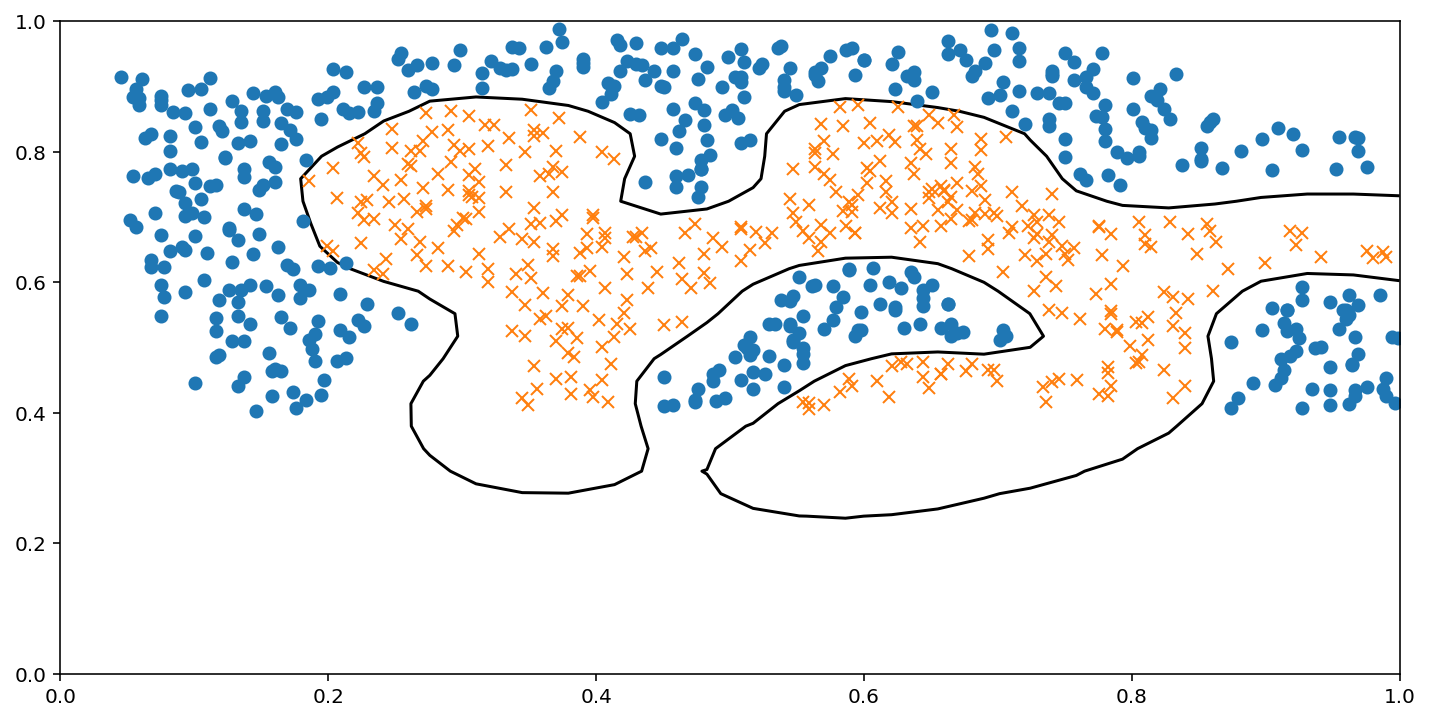

In [414]:
clf_rbf = svm.SVC(kernel='rbf',C=100,gamma=100)
clf_rbf.fit(X2,np.squeeze(y2))
YY, XX = np.meshgrid(np.linspace(0, 1, 30), np.linspace(0, 1, 30))
xy = np.vstack([XX.flatten(),YY.flatten()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)
ax2.contour(XX, YY, Z, colors='k', levels=1)
fig2

## Need Grid Search for optimized parameters

In [416]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 10,20,50,100],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
X_train, X_test, y_train, y_test = train_test_split(
    X2, np.squeeze(y2), test_size=0.5, random_state=0)
print(Counter(y_train))
print(Counter(y_test))

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_s = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf_s.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf_s.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf_s.cv_results_['mean_test_score']
    stds = clf_s.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_s.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf_s.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Counter({1: 248, 0: 183})
Counter({1: 232, 0: 200})
# Tuning hyper-parameters for precision



/Users/runyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/runyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/runyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/runyu/opt/anaconda3/lib/python3.7/site-packages/skl

Best parameters set found on development set:

{'C': 100, 'gamma': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.288 (+/-0.005) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.829 (+/-0.090) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.923 (+/-0.063) for {'C': 1, 'gamma': 20, 'kernel': 'rbf'}
0.975 (+/-0.030) for {'C': 1, 'gamma': 50, 'kernel': 'rbf'}
0.984 (+/-0.025) for {'C': 1, 'gamma': 100, 'kernel': 'rbf'}
0.331 (+/-0.175) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.922 (+/-0.069) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.953 (+/-0.039) for {'C': 10, 'gamma': 20, 'kernel': 'rbf'}
0.988 (+/-0.027) for {'C': 10, 'gamma': 50, 'kernel': 'rbf'}
0.988 (+/-0.031) for {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
0.787 (+/-0.074) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.943 (+/-0.060) for {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
0.978 (+/-0.024) for {'C': 100, 'gamma': 20, 'kernel': 'rbf'}
0.985 (+/-0.024) for {'C': 100, 'gamma': 50, 'kernel': 'rbf'}
0.991 (+/-0.029) fo

# Spam Classification

In [424]:
eml = open('data/emailSample1.txt')
print(eml.read())

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [426]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

words = ["game","gaming","gamed","games"]
ps = PorterStemmer()

for word in words:
    print(ps.stem(word))

game
game
game
game


### Implement this in Python will take a while... I will skip this for now.